In [1]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# Warning 
from yellowbrick.regressor import ResidualsPlot 

In [2]:
# Carregamento da base de dados e exclusão da primeiro coluna
base = pd.read_csv('slr12.csv', delimiter=';')
base.shape

(36, 2)

In [3]:
#primeiros valores da base de dados
base.head()

,FrqAnual,CusInic
0,1000,1050
1,1125,1150
2,1087,1213
3,1070,1275
4,1100,1300


[]

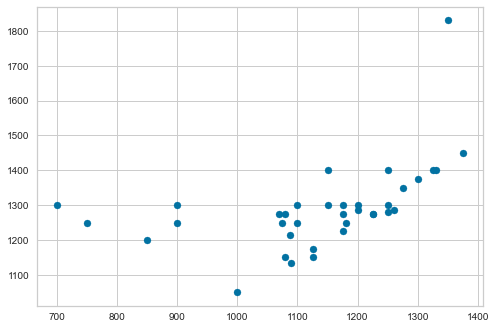

In [4]:
# Visualização da correlação através do grafico de dispersão
plt.scatter(base['FrqAnual'], base['CusInic'])
plt.plot()

In [5]:
# Criação de X e Y: variável independente e variável dependente
# Cálculo da correlação entre X e Y
X = base.iloc[:, 0].values #coluna frqanual
y = base.iloc[:, 1].values #coluna CusInic
correlacao = np.corrcoef(X, y)
correlacao

array([[1.        , 0.47700725],
       [0.47700725, 1.        ]])

In [6]:
#transformando x em matriz para melhor uso do scikit
X = X.reshape(-1, 1)

In [7]:
# Criação do modelo, treinamento, visualização dos coeficientes e do score do modelo
modelo = LinearRegression()
modelo.fit(X, y)

LinearRegression()

In [8]:
#Interceptação
modelo.intercept_

867.604222262056

In [9]:
#inclinação
modelo.coef_

array([0.37315794])

In [10]:
#score R^2
modelo.score(X, y)

0.2275359181555101

In [11]:
# Geração das previsões
previsoes = modelo.predict(X)
previsoes

array([1240.76215819, 1287.40690018, 1273.22689862, 1266.88321371,
       1278.07795178, 1296.73584858, 1334.05164217, 1296.73584858,
       1278.07795178, 1371.36743577, 1343.38059057, 1380.69638416,
       1306.06479698, 1315.39374538, 1306.06479698, 1352.70953897,
       1337.78322153, 1363.90427705, 1362.03848737, 1315.39374538,
       1324.72269377, 1274.34637242, 1268.74900339, 1270.61479307,
       1270.61479307, 1307.93058666, 1324.72269377, 1306.06479698,
       1334.05164217, 1334.05164217, 1147.47267421, 1287.40690018,
       1128.81477741, 1203.4463646 , 1203.4463646 , 1184.7884678 ])

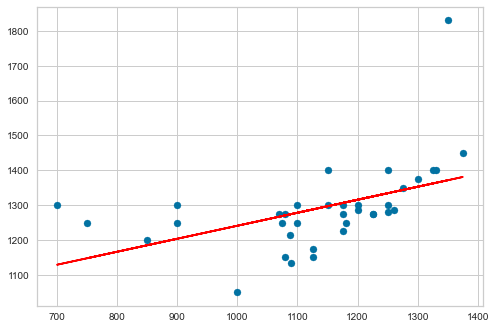

In [12]:
# Visualização dos resultados
plt.scatter(X, y)
plt.plot(X, previsoes, color = 'red')

In [15]:
# Previsão para somente um valor
modelo.predict([[1200]])

array([1315.39374538])

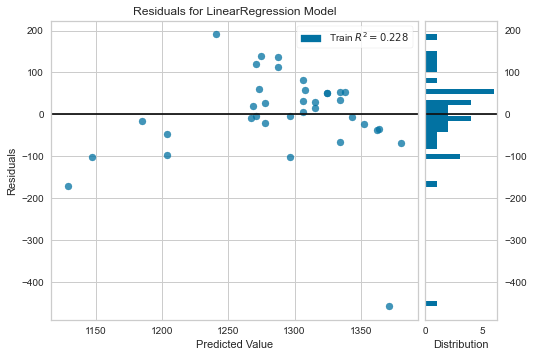

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [14]:
#residuos do modelo
visualizador = ResidualsPlot(modelo)
visualizador.fit(X, y)
visualizador.poof()